In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from datetime import datetime

In [6]:
customer = pd.read_csv('C:/School/customer_analysis.csv', sep='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
customer.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
customer['Income'].fillna(customer['Income'].mean(), inplace=True)

In [9]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Dt_Customer'] = customer['Dt_Customer'].dt.strftime('%Y-%m-%d')
customer.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9044\3263841572.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9044\3263841572.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9044\3263841572.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9044\3263841572.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cu

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
# age extraction
customer['Age'] = 2023 - customer['Year_Birth']
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


In [11]:
# spending power
customer['Spent'] = customer[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,39,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,42,422


In [12]:
customer['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
# household living
def marital_status(Marital_Status):
    if Marital_Status in ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']:
        return 1
    elif Marital_Status in ['Together', 'Married']:
        return 2
customer['Living_With'] = customer['Marital_Status'].apply(marital_status)
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,66,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,69,27,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,776,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,39,53,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,422,2


In [14]:
#family dynamics
customer['Children'] = customer['Kidhome'] + customer['Teenhome']
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,66,1617,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,69,27,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,58,776,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,39,53,2,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,42,422,2,1


In [15]:
# family unity
customer['Family_Size'] = customer['Children'] + customer['Living_With']
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,66,1617,1,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,69,27,1,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,58,776,2,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,39,53,2,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,42,422,2,1,3


In [16]:
#parental status
def Is_Parent(row):
    if row['Children'] > 0:
        return 1
    else:
        return 0
customer['Is_Parent'] = customer.apply(Is_Parent, axis=1)
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,66,1617,1,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,69,27,1,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,776,2,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,39,53,2,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,422,2,1,3,1


In [17]:
# educational evolution
def map_education(education):
    if education in ['Graduation', 'Basic']:
        return 'Undergraduate'
    elif education in ['Master']:
        return 'Graduate'
    elif education in ['PhD']:
        return 'Postgraduate'
customer['Education'] = customer['Education'].map(map_education)
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,66,1617,1,0,1,0
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,69,27,1,2,3,1
2,4141,1965,Undergraduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,776,2,0,2,0
3,6182,1984,Undergraduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,39,53,2,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,422,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,56,1341,2,1,3,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,77,444,2,3,5,1
2237,7270,1981,Undergraduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,42,1241,1,0,1,0
2238,8235,1956,Graduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,67,843,2,1,3,1


In [18]:
# farewall to redundancy
customer.drop(['ID','Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [19]:
# Label Encoding kolom bertipe categorical
customer['Education'] = LabelEncoder().fit_transform(customer['Education'])
customer.head()


,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,1,0,1,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,1,2,3,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,2,0,2,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,2,1,3,1
4,1,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,2,1,3,1


In [20]:
scaler = StandardScaler()
scale_data_cust = scaler.fit_transform(customer)
scale_data_cust = pd.DataFrame(scale_data_cust, columns=customer.columns)
scale_data_cust.head()


,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0.523959,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,...,-0.262111,-0.11651,-0.097282,2.388846,0.985345,1.679417,-1.346874,-1.264505,-1.759115,-1.584605
1,0.523959,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,-1.346874,1.396361,0.446548,0.631072
2,0.523959,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,...,-0.262111,-0.11651,-0.097282,-0.418612,0.317643,0.282673,0.742460,-1.264505,-0.656283,-1.584605
3,0.523959,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,0.742460,0.065928,0.446548,0.631072
4,-0.623322,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,0.742460,0.065928,0.446548,0.631072


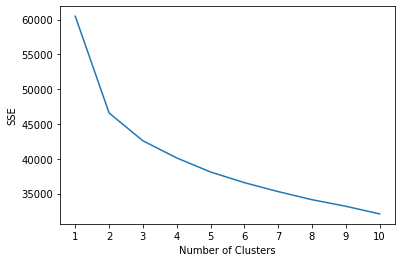

In [21]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42}

# check the inertia for each K
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scale_data_cust)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  3


In [23]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg_cluster = agg_cluster.fit_predict(scale_data_cust)
customer['cluster'] = y_agg_cluster

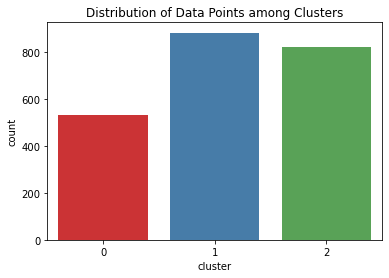

In [33]:
sns.countplot(x='cluster', data=customer, palette='Set1')
plt.title('Distribution of Data Points among Clusters')
plt.show()

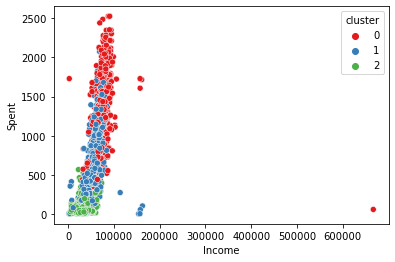

In [27]:
sns.scatterplot(data=customer, x='Income', y='Spent', hue='cluster', palette='Set1')
plt.show()